# A Student Attendance and Wellness - EDA

In [834]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect the Dataset

In [396]:
df = pd.read_csv(r"C:\Users\vxher\OneDrive\Desktop\TO BACKUP\Python Projects\Portfolio Projects\Pandas Project\student_monnitoring_data.csv")
df
# Inspect the first few rows
df.head()

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High


In [398]:
df.tail()

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
14995,500,2024-12-26,9:00-16:00,Late,1.30,7.2,7,10,Low
14996,500,2024-12-27,9:00-15:00,Absent,1.07,7.9,4,6,High
14997,500,2024-12-28,11:00-14:00,Absent,1.67,7.2,3,5,High
14998,500,2024-12-29,11:00-14:00,Late,0.99,7.2,10,9,Medium
14999,500,2024-12-30,9:00-16:00,Present,4.50,5.2,1,4,High


In [400]:
# Check the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          15000 non-null  int64  
 1   Date                15000 non-null  object 
 2   Class Time          15000 non-null  object 
 3   Attendance Status   15000 non-null  object 
 4   Stress Level (GSR)  15000 non-null  float64
 5   Sleep Hours         15000 non-null  float64
 6   Anxiety Level       15000 non-null  int64  
 7   Mood Score          15000 non-null  int64  
 8   Risk Level          15000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


## Data Cleaning

In [556]:
# Check for missing values
df.isnull().sum()

# This dataset did not contain any missing values

Student ID            0
Date                  0
Class Time            0
Attendance Status     0
Stress Level (GSR)    0
Sleep Hours           0
Anxiety Level         0
Mood Score            0
Risk Level            0
Start Hour            0
Time of Day           0
dtype: int64

In [558]:
# check for duplicates
df.duplicated().sum()

# this dataset did not contain any duplicates

0

In [560]:
# Unique values per column
df.nunique()

Student ID            500
Date                   30
Class Time             20
Attendance Status       3
Stress Level (GSR)    451
Sleep Hours            41
Anxiety Level          10
Mood Score             10
Risk Level              3
Start Hour              4
Time of Day             1
dtype: int64

In [564]:
# Generates descriptive statistics

# # Convert 'Student ID' to string
# df['Student ID'] = df['Student ID'].astype(str)

# # Now describe the DataFrame
# df_describe = df.describe()

df_describe

,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Start Hour
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.762538,6.996780,5.546867,5.471533,9.501667
std,1.301927,1.150973,2.870323,2.868984,1.119977
min,0.500000,5.000000,1.000000,1.000000,8.000000
25%,1.640000,6.000000,3.000000,3.000000,8.000000
50%,2.760000,7.000000,6.000000,5.000000,9.000000
75%,3.900000,8.000000,8.000000,8.000000,11.000000
max,5.000000,9.000000,10.000000,10.000000,11.000000


## Analysis

Attendance Status Analysis

First I will take a look at how students are distributed across different attendance statuses (e.g., "Absent," "Late," "Present") to see if one category dominates the dataset.

In [582]:
# Count occurrences of each unique attendance status
attendance_counts = df['Attendance Status'].value_counts()

# Print the result
print("\nAttendance Status Counts:")
print(attendance_counts)


Attendance Status Counts:
Attendance Status
Late       5032
Absent     5002
Present    4966
Name: count, dtype: int64


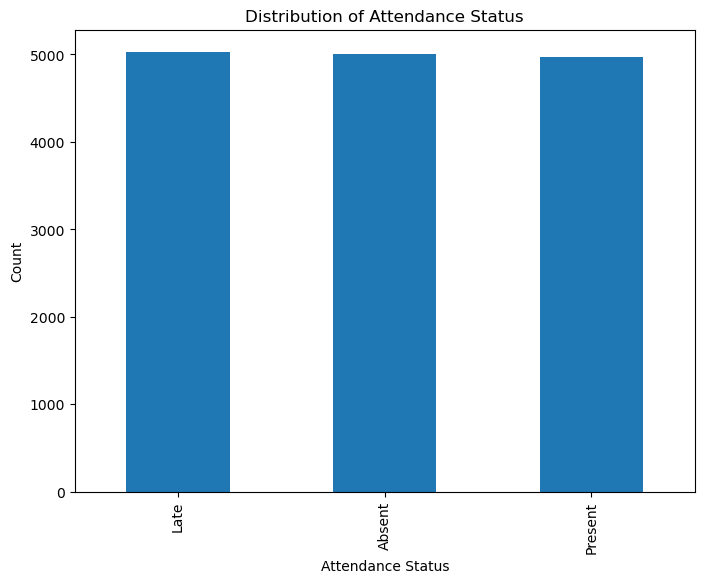

In [578]:
# Visualization
plt.figure(figsize=(8, 6))
attendance_counts.plot(kind='bar')
plt.title("Distribution of Attendance Status")
plt.ylabel("Count")
plt.xlabel("Attendance Status")
plt.show()

Health Metrics Analysis

I'd like to see if what affect sleep hours has on mood scores and risk scores.

In [861]:
stu = df[df['Attendance Status'].isin(['Present', 'Late', 'Absent'])]
stu = stu.reset_index(drop=True)

In [852]:
df_agg = stu.groupby('Risk Level').agg(
    avg_sleep=pd.NamedAgg(column='Sleep Hours', aggfunc='mean'), 
    avg_mood=pd.NamedAgg(column='Mood Score', aggfunc='mean')
)

In [863]:
sorted_df = df_agg.sort_values(by=['avg_sleep'], ascending=True)
sorted_df = sorted_df.reset_index(drop=True)

In [865]:
sorted_df = df_agg.sort_values(by=['avg_sleep'], ascending=True)
sorted_df

,avg_sleep,avg_mood
Risk Level,,
Low,6.980923,6.952002
Medium,6.990027,4.030158
High,7.005668,5.469690


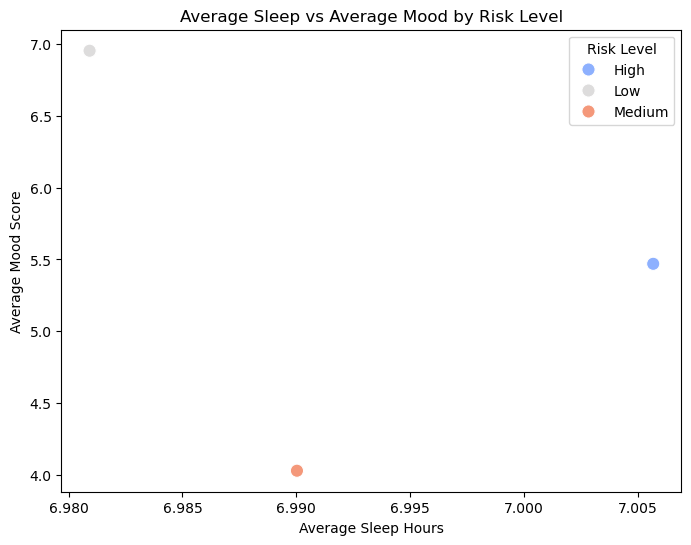

In [867]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_agg, x='avg_sleep', y='avg_mood', hue='Risk Level', palette='coolwarm', s=90)
plt.title("Average Sleep vs Average Mood by Risk Level")
plt.xlabel("Average Sleep Hours")
plt.ylabel("Average Mood Score")
plt.legend(title="Risk Level")
plt.show()

Risk Level Analysis

I'd like to see the distribution of risk levels.


Risk Level Counts:
Risk Level
High      8380
Medium    3349
Low       3271
Name: count, dtype: int64


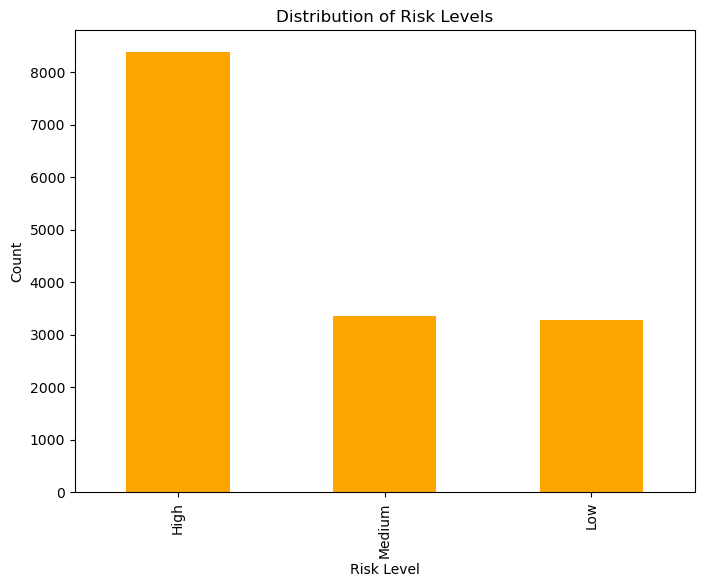

In [906]:
# Distribution of risk levels
risk_counts = df['Risk Level'].value_counts()
print("\nRisk Level Counts:")
print(risk_counts)

# Visualization
plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar', color='orange')
plt.title("Distribution of Risk Levels")
plt.ylabel("Count")
plt.xlabel("Risk Level")
plt.show()

Trends Over Time

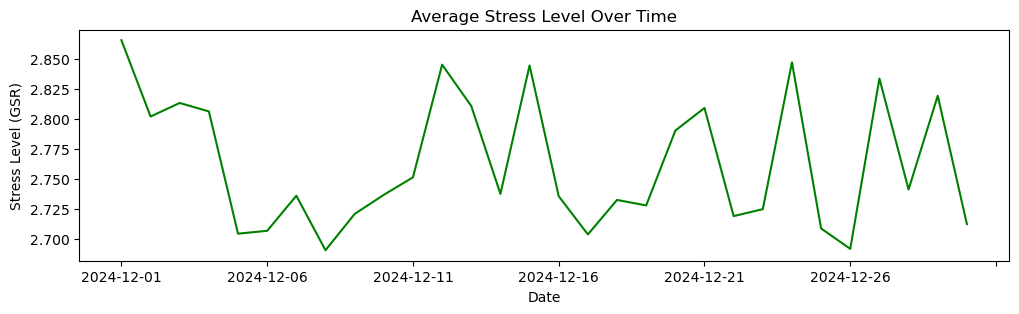

In [945]:
# # Average stress levels over time
time_trends = df.groupby('Date')['Stress Level (GSR)'].mean()

# Visualization
plt.figure(figsize=(12, 3))
time_trends.plot(color='green')
plt.title("Average Stress Level Over Time")
plt.ylabel("Stress Level (GSR)")
plt.xlabel("Date")
plt.show()

Summary Statistics by Attendance

In [911]:
# Group by Attendance Status and calculate the mean for stress, sleep, and mood scores
attendance_summary = df.groupby('Attendance Status')[['Stress Level (GSR)', 'Sleep Hours', 'Mood Score']].mean()
print("\nAverage Stress, Sleep, and Mood Scores by Attendance Status:")
print(attendance_summary)


Average Stress, Sleep, and Mood Scores by Attendance Status:
                   Stress Level (GSR)  Sleep Hours  Mood Score
Attendance Status                                             
Absent                       2.744024     7.008856    5.425630
Late                         2.775401     6.975060    5.494038
Present                      2.768151     7.006625    5.494966


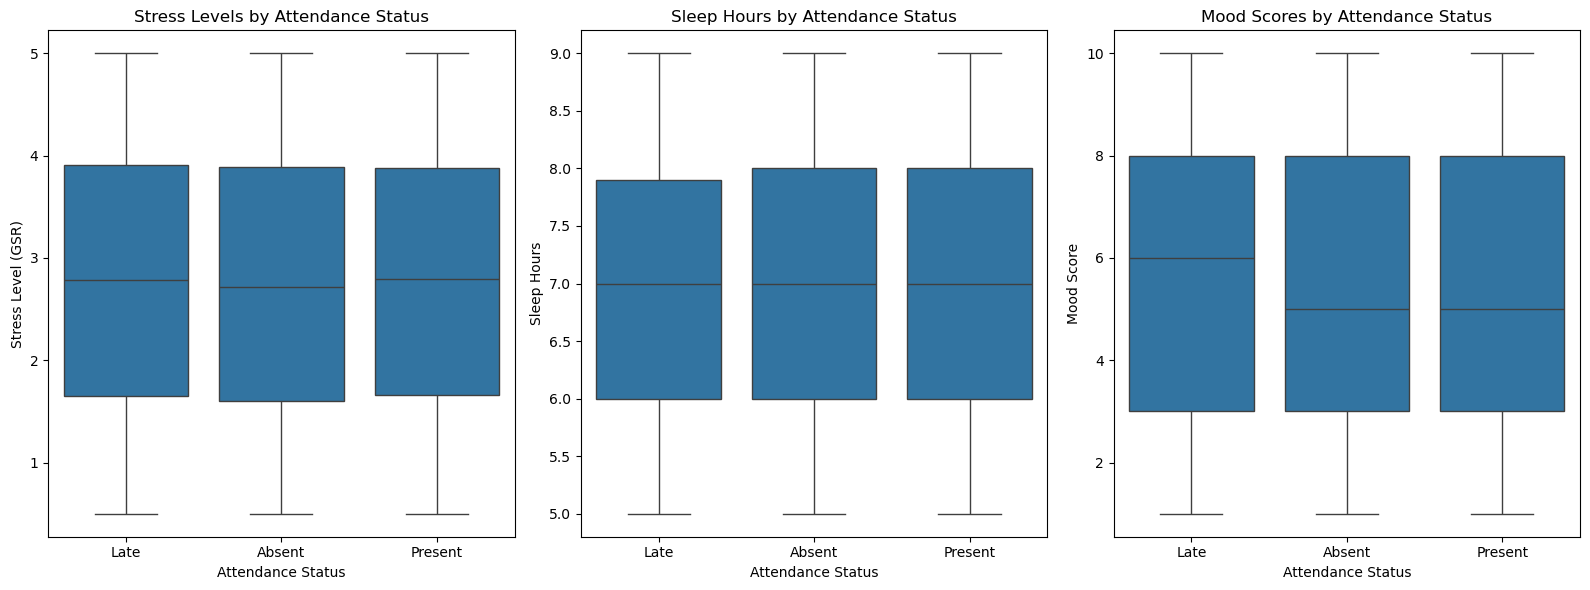

In [951]:
# Set up the figure
plt.figure(figsize=(16, 6))

# Stress Level
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Attendance Status', y='Stress Level (GSR)')
plt.title("Stress Levels by Attendance Status")
plt.ylabel("Stress Level (GSR)")
plt.xlabel("Attendance Status")

# Sleep Hours
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Attendance Status', y='Sleep Hours')
plt.title("Sleep Hours by Attendance Status")
plt.ylabel("Sleep Hours")
plt.xlabel("Attendance Status")

# Mood Score
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Attendance Status', y='Mood Score')
plt.title("Mood Scores by Attendance Status")
plt.ylabel("Mood Score")
plt.xlabel("Attendance Status")

plt.tight_layout()

Summary Statistics by Anxiety level


Average Stress, Sleep, and attendance Scores by Anxiety:
               Stress Level (GSR)  Sleep Hours  Mood Score
Anxiety Level                                             
1                        2.714532     7.002218    5.610534
2                        2.777033     7.004922    5.602158
3                        2.753773     7.027692    5.458194
4                        2.761474     6.989650    5.412611
5                        2.697222     6.973864    5.447005
6                        2.809132     7.020496    5.300914
7                        2.744718     7.030498    5.511628
8                        2.810539     6.927744    5.408316
9                        2.740450     6.957749    5.494534
10                       2.815078     7.031777    5.476005


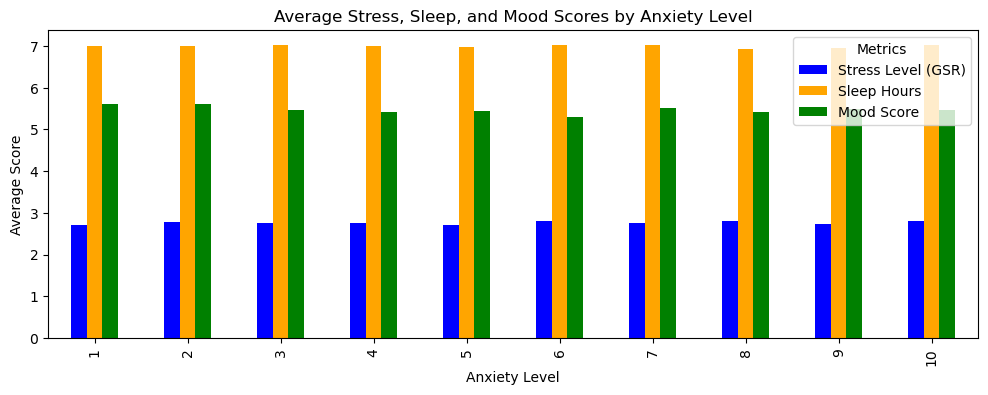

In [990]:
# Reset index for plotting
anxiety_summary = df.groupby('Anxiety Level')[['Stress Level (GSR)', 'Sleep Hours', 'Mood Score']].mean()
print("\nAverage Stress, Sleep, and attendance Scores by Anxiety:")
print(attendance_summary)

# Plot the data as a grouped bar chart
anxiety_summary.plot(kind='bar', figsize=(12, 4), color=['blue', 'orange', 'green'])

# Add titles and labels
plt.title("Average Stress, Sleep, and Mood Scores by Anxiety Level")
plt.ylabel("Average Score")
plt.xlabel("Anxiety Level")
plt.legend(["Stress Level (GSR)", "Sleep Hours", "Mood Score"], title="Metrics")

## Summary of Exploratory Data Analysis

**Attendance Status**:
   - Attendance status was pretty evenly distributed.
  
**Health Metrics**:
   - The average sleep duration is very similar across all risk levels, with only slight variations.
   - Low Risk: Students in the "Low Risk" category report the highest average mood scores.
   - Medium Risk: The "Medium Risk" group shows the lowest average mood score, even with similar sleep durations.
   - High Risk: The "High Risk" group falls between the two, with an average mood score of.
   - Despite having similar sleep hours, the mood scores vary significantly. There could be other factrors such as stress levels, anxiety, etc. that might play a stronger role in mood differences than sleep duration alone. Medium Risk students show a notable dip in mood despite sleeping as much as the other groups. This may warrant further investigation into stress or anxiety levels for this group.

**Risk Levels**:
   - The High Risk category has a significantly larger count compared to Medium and Low risk levels. Nearly twice as many entries are in the High Risk group compared to either of the lower categories.
   - The Medium Risk and Low Risk groups are relatively close in size, with only 78 more entries in the Medium Risk group.
   - The large number of High Risk entries suggests this category may warrant more attention for interventions or further analysis.

**Time Trends**:
   - Over the period this data was gathered, the average stress level fluctuates slightly day-to-day, with values ranging approximately between 2.69 and 2.86. The stress levels are relatively stable over time, with no drastic highs or lows.
   - Further investigate can be performed to see if certain dates correlate with events like exams or holidays that might impact stress.

**Statistics by Attendance**:
- Students who are late experience slightly higher stress than those who are present or absent.
- Being absent is not strongly linked to lower sleep hours, but late attendance correlates with slightly reduced sleep.
-  Students who are present or late tend to report better mood scores than those who are absent, suggesting that attendance positively correlates with mood.

**Statistics by Anxiety**:
- As expected, higher anxiety levels correlate with slightly elevated stress levels.
- Mood scores show a consistent decline as anxiety increases, emphasizing the mental health impact of anxiety.
- Sleep hours are relatively stable across anxiety levels, indicating that anxiety may not significantly disrupt sleep in this dataset